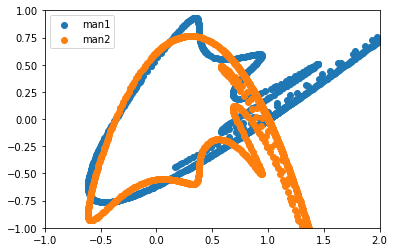

In [2]:
import matplotlib.pyplot as plt
import numpy as np

k = 1.5



#Applies the given dynamical system to [x,y] with parameter k predetermined
def g( vector ):
    xinput = vector[0]
    yinput = vector[1]
    
    xoutput = xinput + k * xinput * (xinput - 1) + yinput
    youtput = k * xinput * (xinput - 1) + yinput
  
    
    return [xoutput, youtput]

#Applies the inverse of g to [x,y]
def ginv( vector ):
    xinput = vector[0]
    yinput = vector[1]
    
    xoutput = xinput - yinput
    youtput = yinput - k * xoutput * (xoutput - 1)
    
    return [xoutput, youtput]

#Jacobian of g at [1,0] with parameter k
Dg = np.matrix([[1+k, 1],[k, 1]])



#Computes eigenvalues and eigenvalues of Dg
eig = np.linalg.eig(Dg)
eig1 = eig[0][0]
eig2 = eig[0][1]
eigvec1 = eig[1].T[0]
eigvec2 = eig[1].T[1]

eigplot1 = np.zeros([200,2])
eigplot2 = np.zeros([200,2])




#Samples 100 points in both directions of the eigenspace, translated to [1,0]
for i in range(0,200):
    eigplot1[i] = [1,0] + (0.000001 * i - 0.0001) * eigvec1
    eigplot2[i] = [1,0] + (0.000001 * i - 0.0001) * eigvec2
    
    
man1 = np.zeros([3000,2])
man2 = np.zeros([3000,2])
    
    
#Applies g  or ginv to each point in the eigplots 15 times, taking into account whether the manifold is stable or unstable
for i in range(0,200):
    pt1 = eigplot1[i]
    pt2 = eigplot2[i]
    iterate1 = pt1
    iterate2 = pt2
    for j in range(0,15):
        man1[15 * i + j] = iterate1
        man2[15 * i + j] = iterate2     
        if eig1 >= 1:
            iterate1 = g( iterate1 )
        else:
            iterate1 = ginv( iterate1 )
        if eig2 >= 1:
            iterate2 = g( iterate2 )
        else:
            iterate2 = ginv( iterate2 )



plt.scatter(man1[:,0], man1[:,1], label = 'man1')
plt.scatter(man2[:,0], man2[:,1], label = 'man2')
plt.xlim([-1,2])
plt.ylim([-1,1])
plt.legend()
plt.show()

